In [47]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [48]:
train_df = pd.read_csv("Train_csv.csv")
train_df

,MRI_ID,OAS_Session_ID,days_to_visit,age_at_visit,MMSE,memory,orient,judgment,commun,homehobb,perscare,CDRTOT
0,OAS30001_MR_d0129,OAS30001_UDSb4_d0000,0,65.19,28.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,OAS30001_MR_d0129,OAS30001_UDSb4_d0000,0,65.19,28.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,OAS30001_MR_d0757,OAS30001_UDSb4_d0722,722,67.17,30.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,OAS30001_MR_d0757,OAS30001_UDSb4_d0722,722,67.17,30.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,OAS30001_MR_d2430,OAS30001_UDSb4_d2181,2181,71.17,30.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
553,OAS31156_MR_d0001,OAS31156_UDSb4_d0000,0,81.40,21.0,2.0,2.0,1.0,2.0,2.0,3,2.0
554,OAS31164_MR_d0069,OAS31164_UDSb4_d4753,4753,93.48,NaN,2.0,1.0,2.0,1.0,2.0,2,2.0
555,OAS31164_MR_d0069,OAS31164_UDSb4_d4753,4753,93.48,NaN,2.0,1.0,2.0,1.0,2.0,2,2.0
556,OAS31164_MR_d1678,OAS31164_UDSb4_d4753,4753,93.48,NaN,2.0,1.0,2.0,1.0,2.0,2,2.0


In [49]:
train_list = train_df.values.tolist()

<Axes: >

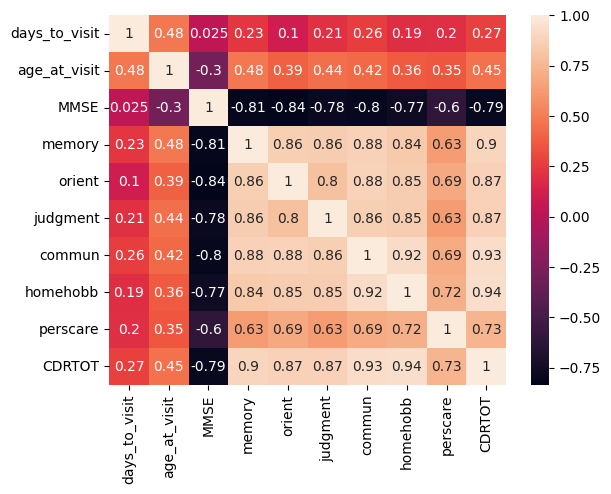

In [50]:
sns.heatmap(train_df.corr(numeric_only = True), annot = True)

In [51]:
X = train_df[~train_df["MMSE"].isna()][["age_at_visit", "memory", "orient", "judgment", "commun", "homehobb", "perscare", "CDRTOT"]]
y = train_df[~train_df["MMSE"].isna()]["MMSE"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

print("Intercept :", reg_model.intercept_)
print("Coefficients :", reg_model.coef_)


Intercept : 25.358514430053578
Coefficients : [ 0.06269215 -2.1327988  -2.92833003 -0.96134018 -1.01414459  0.20633956
  0.00407095 -0.28576466]


In [53]:
y_pred = reg_model.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3.1073605143991094
0.743191318771242


In [54]:
for i in range(len(train_df)):
    if(pd.isna(train_df.iat[i, 4])):
        train_df.iat[i, 4] = int(reg_model.predict([[train_list[i][3]] + train_list[i][5:]]))

c:\Users\shrik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\shrik\AppData\Local\Temp\ipykernel_3768\104364947.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_df.iat[i, 4] = int(reg_model.predict([[train_list[i][3]] + train_list[i][5:]]))
c:\Users\shrik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\shrik\AppData\Local\Temp\ipykernel_3768\104364947.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single

In [55]:
train_df.to_csv("Train_csv_model.csv", index = False)